#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('Salaries.csv',index_col=0)
df.head()


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

## Data Exploration

In [3]:
print('Number of Rows:', df.shape[0])
print('Number of Columns:', df.shape[1])

Number of Rows: 148654
Number of Columns: 12


In [4]:
data_types = df.dtypes
print(data_types)

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148654 entries, 1 to 148654
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148654 non-null  object 
 1   JobTitle          148654 non-null  object 
 2   BasePay           148045 non-null  float64
 3   OvertimePay       148650 non-null  float64
 4   OtherPay          148650 non-null  float64
 5   Benefits          112491 non-null  float64
 6   TotalPay          148654 non-null  float64
 7   TotalPayBenefits  148654 non-null  float64
 8   Year              148654 non-null  int64  
 9   Notes             0 non-null       float64
 10  Agency            148654 non-null  object 
 11  Status            0 non-null       float64
dtypes: float64(8), int64(1), object(3)
memory usage: 14.7+ MB


### Check for missing values in each column

In [6]:
df.isnull().sum()

EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

## Descriptive Statistics

In [7]:
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [8]:
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode().iloc[0]
max_salary = df['TotalPay'].max()
min_salary = df['TotalPay'].min()
salary_range = max_salary - min_salary

print('Median Salary: ', median_salary)
print('Mode Salary: ', mode_salary)
print('Salary Range: ', salary_range)

Median Salary:  71426.60999999999
Mode Salary:  0.0
Salary Range:  568213.56


## Data Cleaning

1. Remove the columns : 'Notes', 'Status' becuase the entire columns is Null.
2. Recalculate the missing values in column Benefits by subtract the column 'TotalPay' from the column 'TotalPayBenefits'.
3. Replece the missing values in each of the columns 'BasePay', 'OvertimePay', 'OtherPay' by the mean of each colmns to
avoid loss the data and info if we delete all rows.we can use the median instad of the mean if our dataset was has outliers.

In [9]:
columns_to_remove = ['Notes', 'Status']
df.drop(columns=columns_to_remove,axis=1,inplace=True)

In [10]:
df['Benefits'] = df['TotalPayBenefits'] - df['TotalPay']

In [11]:
df['BasePay'].fillna(df['BasePay'].mean(),inplace=True)  
df['OvertimePay'].fillna(df['OvertimePay'].mean(),inplace=True)
df['OtherPay'].fillna(df['OtherPay'].mean(),inplace=True)

## Data Visualization

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


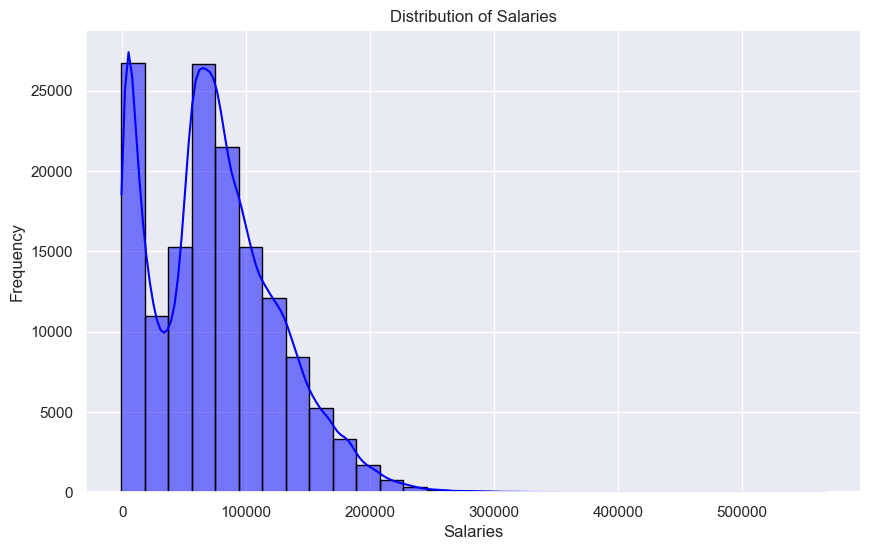

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('Salaries')
plt.ylabel('Frequency')
plt.show()

Number of Negative BasePay: 11


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


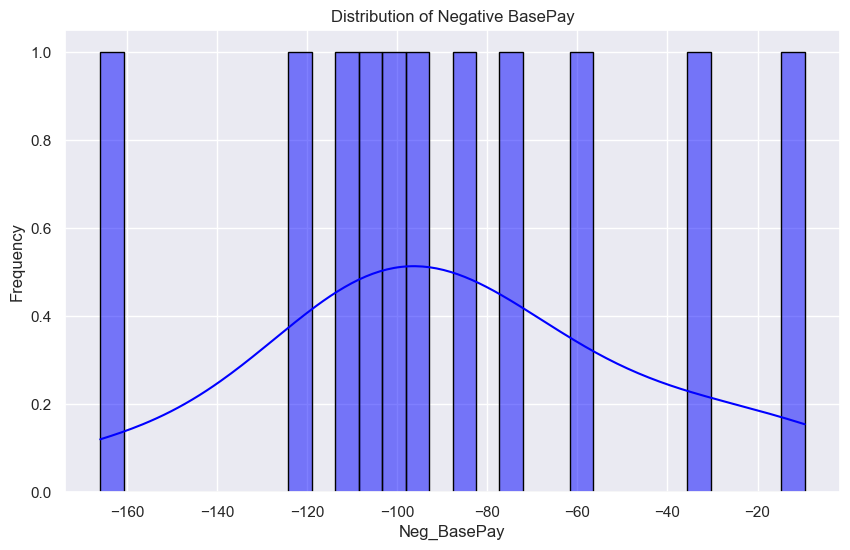

In [13]:
neg_salary = df[df['BasePay'] < 0]
print('Number of Negative BasePay:',neg_salary['BasePay'].count())
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(neg_salary['BasePay'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Negative BasePay')
plt.xlabel('Neg_BasePay')
plt.ylabel('Frequency')
plt.show()

In [14]:
len(df['JobTitle'].unique())

2159

#### Variations in capitalization (e.g, "Transit Operator" vs "TRANSIT OPERATOR") may be due to inconsistencies in data entry

In [15]:
top_n = 13
department_counts = df['JobTitle'].value_counts().nlargest(top_n)
department_counts

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Deputy Sheriff                  1933
Police Officer                  1476
SPECIAL NURSE                   1402
Name: count, dtype: int64

In [16]:
df['JobTitle'] = [x.lower() for x in df['JobTitle']]

In [17]:
len(df['JobTitle'].unique())

1637

In [18]:
department_counts = df['JobTitle'].value_counts().nlargest(top_n)
department_counts

JobTitle
transit operator                9424
special nurse                   5791
registered nurse                4955
custodian                       3214
firefighter                     3153
recreation leader               2663
deputy sheriff                  2618
public svc aide-public works    2518
police officer 3                2421
patient care assistant          1945
public service trainee          1656
attorney (civil/criminal)       1503
police officer                  1476
Name: count, dtype: int64

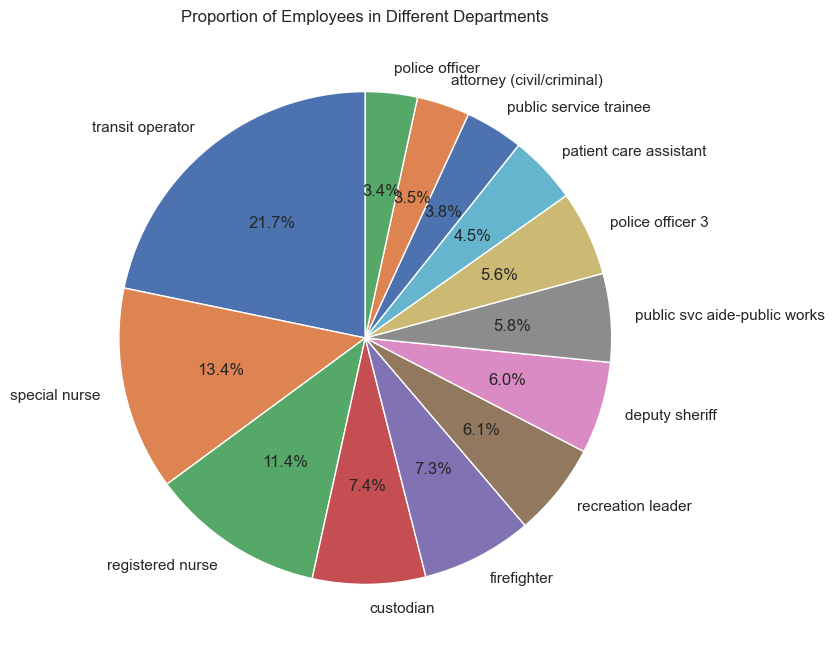

In [19]:
plt.figure(figsize=(12, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees in Different Departments')
plt.show()

In [20]:
mean_salary_by_year = df.groupby(['Year'])['TotalPay'].mean()

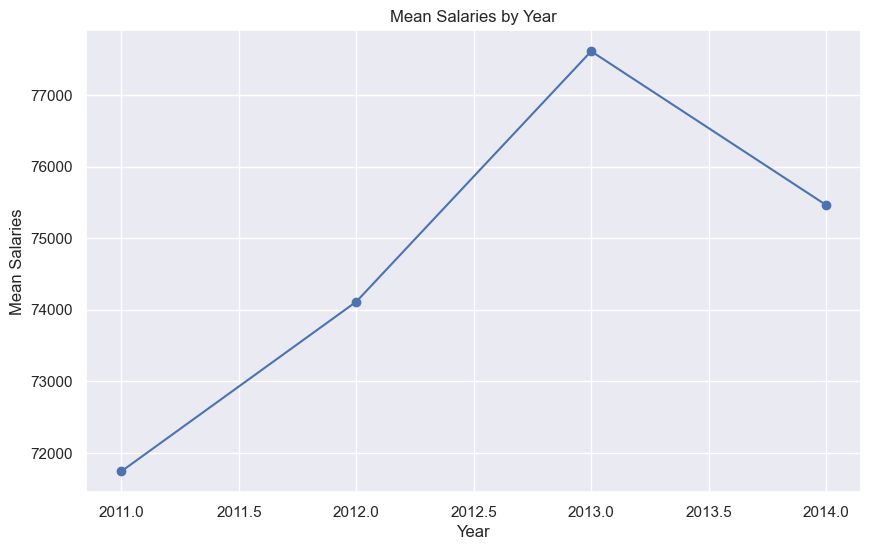

In [21]:
plt.figure(figsize=(10, 6))
mean_salary_by_year.plot(marker='o', linestyle='-', color='b')
plt.title('Mean Salaries by Year')
plt.xlabel('Year')
plt.ylabel('Mean Salaries')
plt.grid(True)
plt.show()

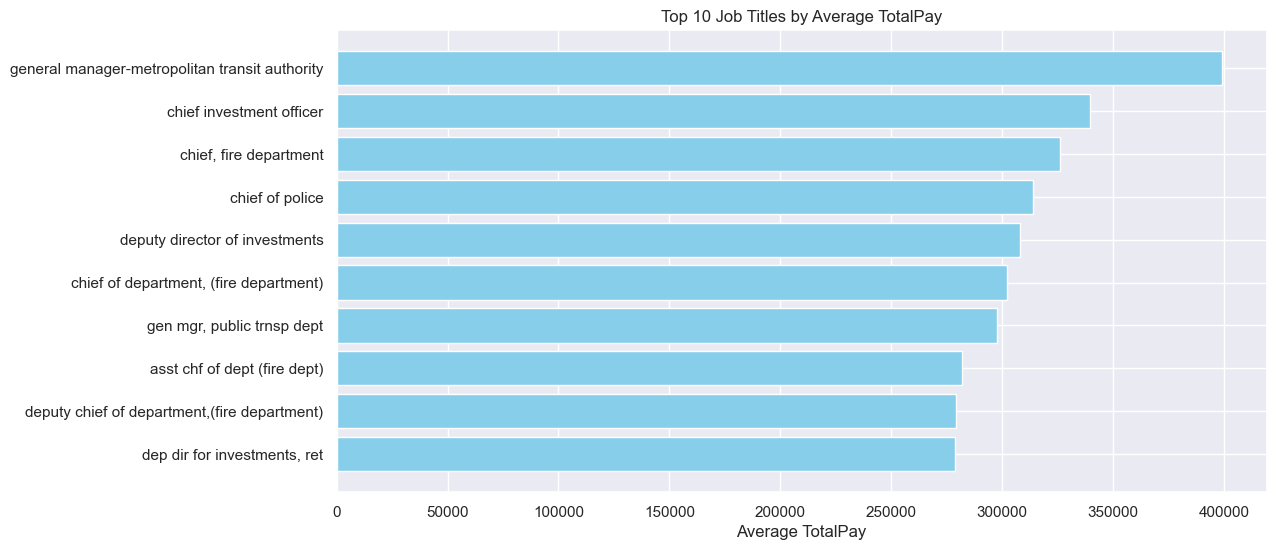

In [22]:
job_title_groups = df.groupby('JobTitle')['TotalPay'].mean().reset_index()

sorted_job_title_groups = job_title_groups.sort_values(by='TotalPay', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(sorted_job_title_groups['JobTitle'][:10], sorted_job_title_groups['TotalPay'][:10], color='skyblue')
plt.xlabel('Average TotalPay')
plt.title('Top 10 Job Titles by Average TotalPay')
plt.gca().invert_yaxis() 
plt.show()

In [23]:
correlation = df['TotalPay'].corr(df['OvertimePay'])
print(f'Correlation between TotalPay and OvertimePay: {correlation:.2f}')

Correlation between TotalPay and OvertimePay: 0.50


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


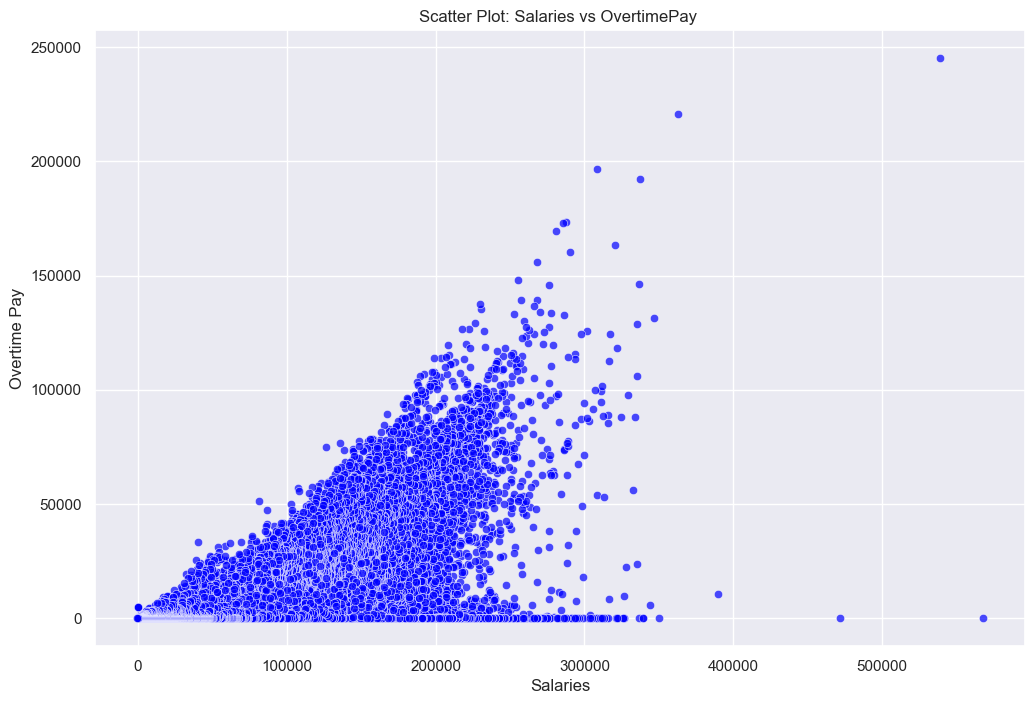

In [24]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TotalPay', y='OvertimePay', data=df, color='blue', alpha=0.7)
plt.title('Scatter Plot: Salaries vs OvertimePay ')
plt.xlabel('Salaries')
plt.ylabel('Overtime Pay')
plt.show()

In [25]:
correlation = df['TotalPay'].corr(df['BasePay'])
print(f'Correlation between TotalPay and BasePay: {correlation:.2f}')

Correlation between TotalPay and BasePay: 0.95


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


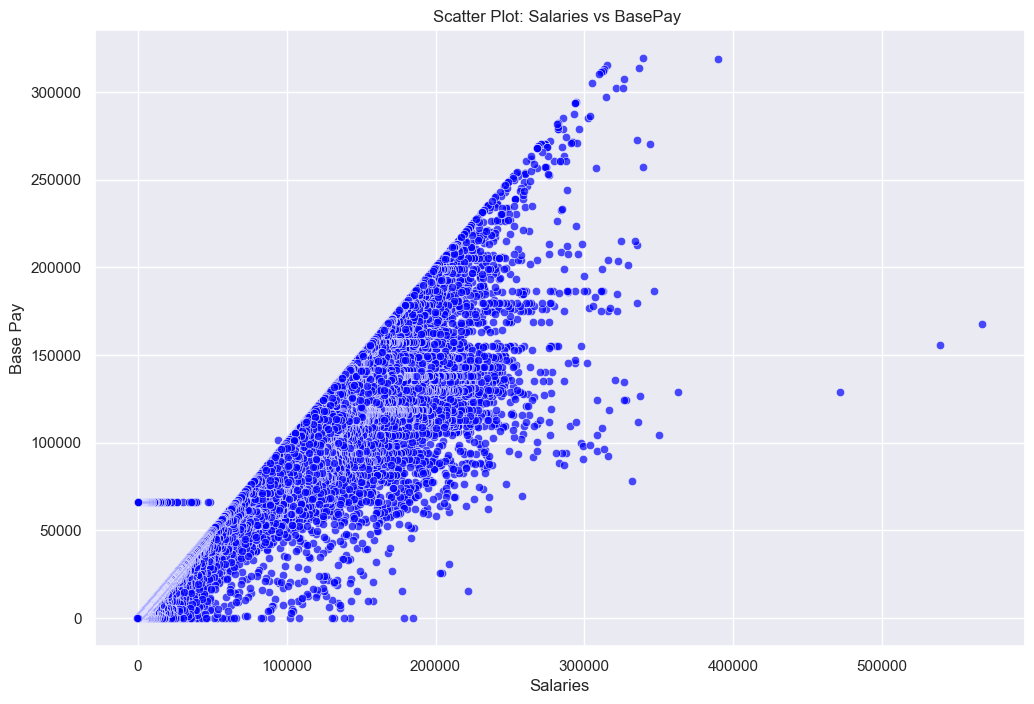

In [26]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TotalPay', y='BasePay', data=df, color='blue', alpha=0.7)
plt.title('Scatter Plot: Salaries vs BasePay ')
plt.xlabel('Salaries')
plt.ylabel('Base Pay')
plt.show()

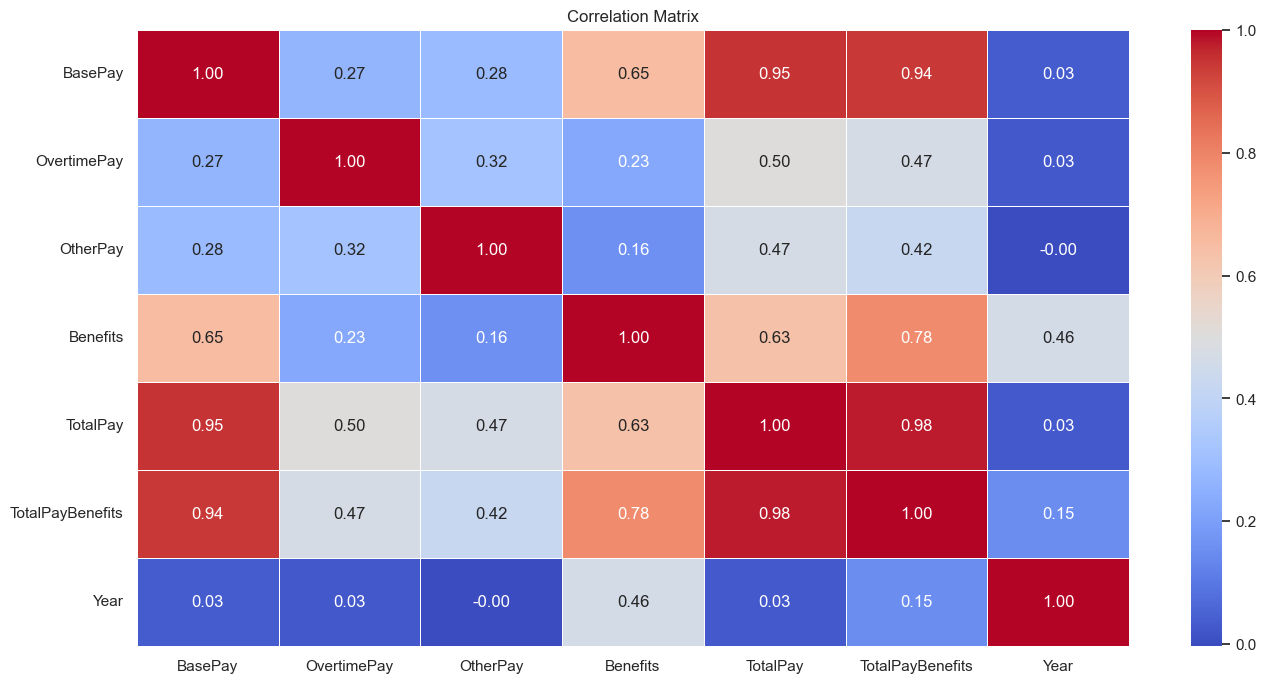

In [27]:
numerical_columns= df.select_dtypes(include=['float64','int64']).columns

numerical_data = df[numerical_columns]
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

## Summary of Insights

1. The distribution of 'Salaries' is positively skewed, as the mean is greater than the median.

2. The presence of negative values in Salaries may warrant further investigation to understand
the context and reasons for negative salaries. 

3. A standard deviation indicates that there is a large variation in salary amounts, 
which indicates a variety of salaries in the dataset.

4. The maximum salary of $567,595 is higher than the upper quartile, indicating 
the presence of potential outliers or high earners in the dataset.

5. The mode salary is reported as $0.0. The mode represents the most frequently occurring value 
in the dataset. In this case, it indicates that there are instances where the 'BasePay' is zero. 
This could be due to various reasons, such as unpaid positions or entries with missing or undefined salary information.

6. The salary range, calculated as the difference between the maximum and minimum salaries is $ 568,213

7. The top job title is "Transit Operator," suggesting it is the most frequently occurring job title in the dataset.
8. Health-related roles, such as "Special Nurse" and "Registered Nurse," are among the top job titles, indicating a significant presence of healthcare professionals.
Public service roles like "Public Svc Aide-Public Works," "Police Officer," and "Firefighter" also have notable representation.


10. There is a general upward trend in the average salaries from 2011 to 2013, suggesting an overall increase in salaries during this period.
11. The slight decrease in average salaries in 2014 could be indicative of a change in salary dynamics or other external factors affecting compensation.

12. The moderate positive correlation (0.50) between 'Salary' and 'OvertimePay' indicates that there is a discernible 
relationship between these two variables. This information can be valuable for organizations seeking to understand how 
overtime work contributes to the overall compensation of their employees.
13. The very high positive correlation (0.95) between “Salary” and “BasePay” indicates a high reliance on base pay in determining total employee compensation. This finding can guide organizations in improving their compensation strategies and understanding the factors that drive total compensation.